# 11.1

## a)

[Link](https://www.bfs.admin.ch/bfs/en/home/services/recherche/stat-tab-online-data-search.html)

## b)

Datensatz von Ilias verwendet

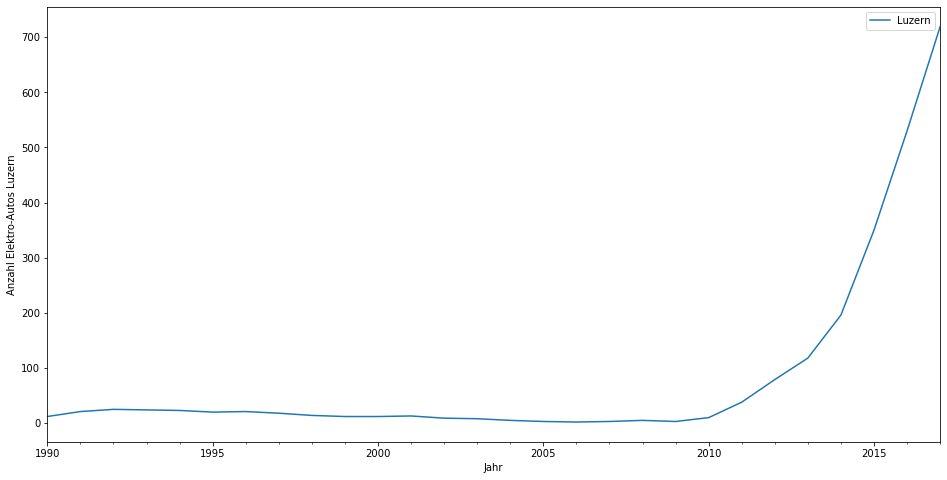

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = [16, 8]

pw_electric = pd.read_csv('personenwagen.csv', sep=',', skiprows=2, header=0, encoding='utf-8', index_col=0)

pw_electric_luzern = pd.DataFrame(pw_electric.loc['Luzern', '1990':'2017'])
pw_electric_luzern['Year'] = pd.DatetimeIndex(pw_electric_luzern.index)
pw_electric_luzern.set_index('Year', inplace=True)

pw_electric_luzern.plot()
plt.xlabel('Jahr')
plt.ylabel('Anzahl Elektro-Autos Luzern')
plt.show()

## d)

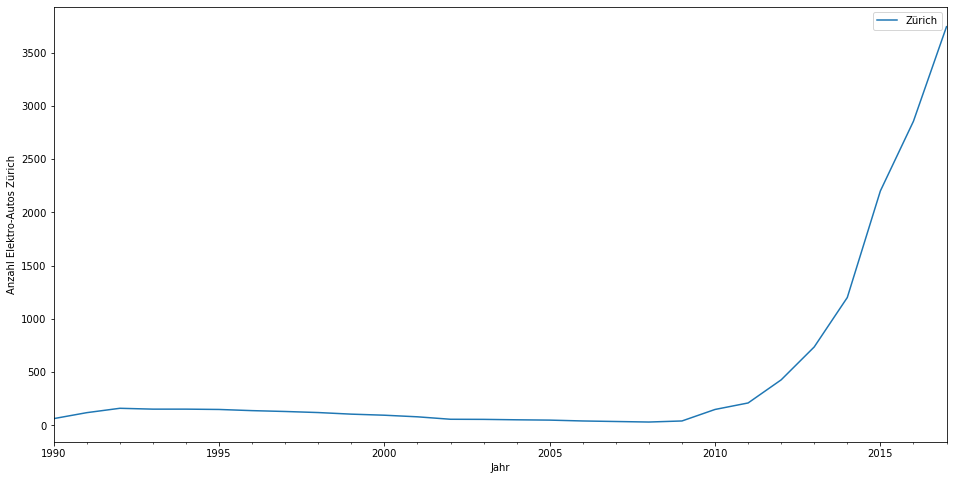

In [4]:
pw_electric_zurich = pd.DataFrame(pw_electric.loc['Zürich', '1990':'2017'])
pw_electric_zurich['Year'] = pd.DatetimeIndex(pw_electric_zurich.index)
pw_electric_zurich.set_index('Year', inplace=True)

pw_electric_zurich.plot()
plt.xlabel('Jahr')
plt.ylabel('Anzahl Elektro-Autos Zürich')
plt.show()

## e)

Man müsste die Anzahl von Zulassungen der Elektrofahrzeuge relativ zur Gesamtzahl an Fahrzeugzulassungen des jeweiligen Kantons betrachten: Die Daten müssen mit der Gesamtzahl von Autos normalisiert werden.

Da die Gesamtzahl nicht im Datensatz vorhanden ist, muss man auf den _relativen Zuwachs_ ausweichen, welcher über die Differenz der Logarithmen berechnet werden kann:

$$ log(X_k) - log(X_{k-1}) $$

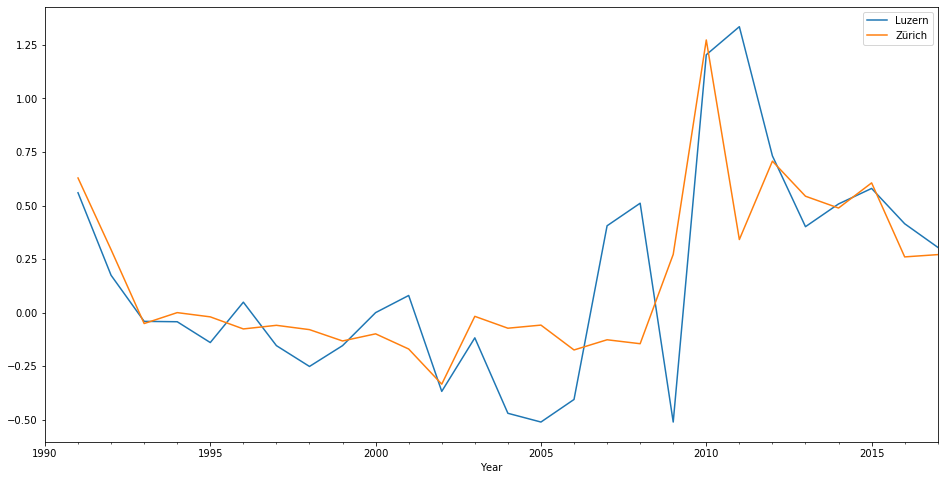

In [5]:
lu_float = pw_electric_luzern['Luzern'].astype('float')
lu_rel = np.log(lu_float) - np.log(lu_float.shift(1))

zh_float = pw_electric_zurich['Zürich'].astype('float')
zh_rel = np.log(zh_float) - np.log(zh_float.shift(1))

pw_rel = pd.DataFrame({'Luzern': pd.Series(lu_rel), 'Zürich': pd.Series(zh_rel)})
pw_rel.plot()
plt.show()

# 11.2

## a)

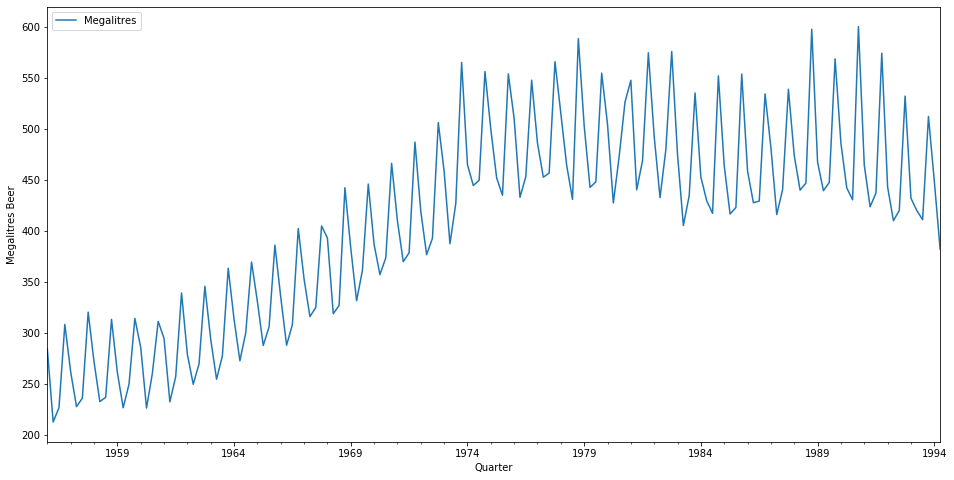

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

matplotlib.rcParams['figure.figsize'] = [16, 8]

beer = pd.read_csv('beer.csv', sep=';', header=0)
beer['Quarter'] = pd.DatetimeIndex(beer['Quarter'])
beer.set_index('Quarter', inplace=True)
beer.columns = ['Megalitres']

beer.plot()
plt.ylabel('Megalitres Beer')
plt.show()

## b)

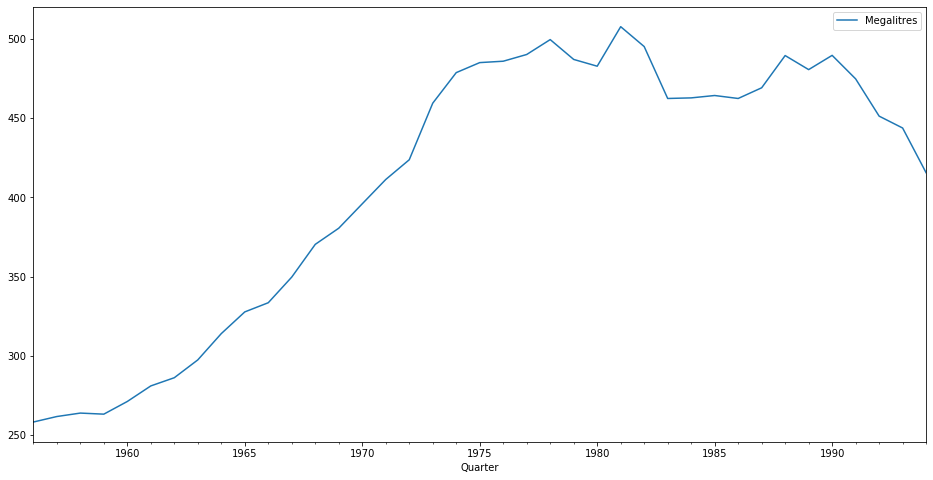

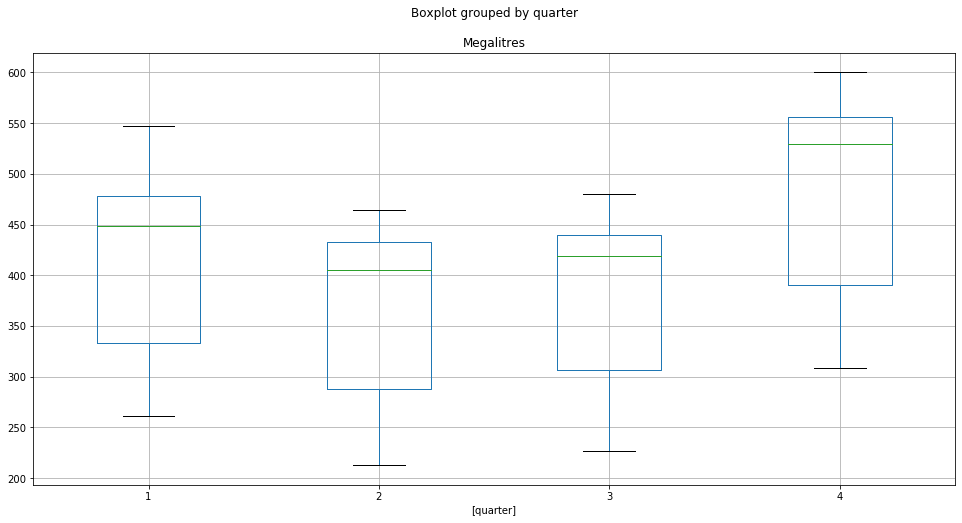

In [20]:
beer.resample('A').mean().plot()
beer['quarter'] = beer.index.quarter
beer.boxplot(by='quarter')

## c)

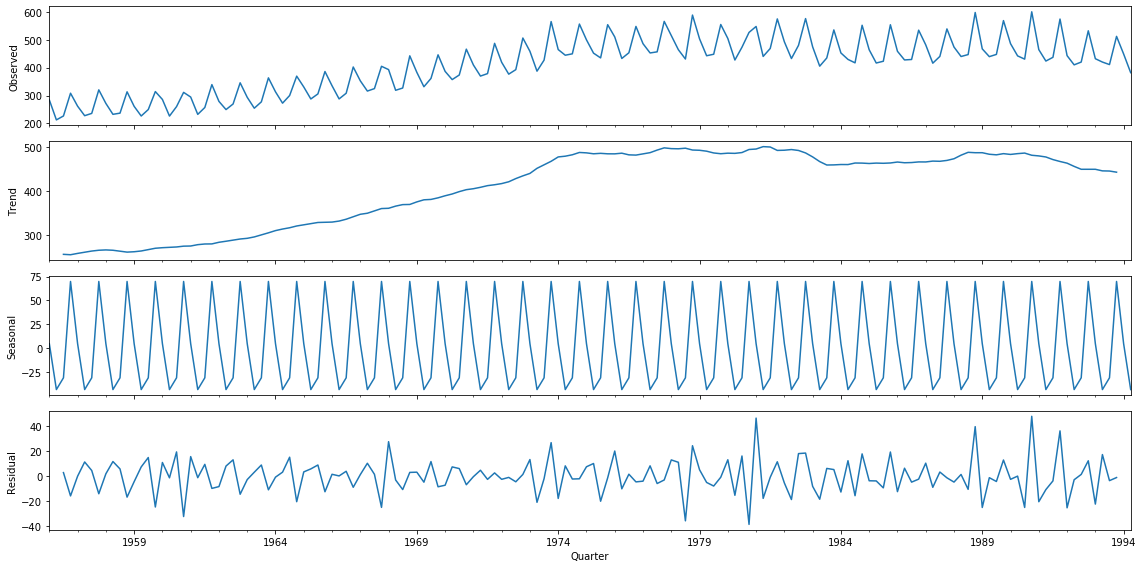

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(beer['Megalitres'], model='additive', freq=4).plot()
plt.show()

- Die saisonalen Effekte sind ziemlich stabil über den Zeitraum verteilt.
- Für die Zerlegung ist somit keine Transformation nötig.
- Beim Restterm (Residual) ist kaum ein Muster mehr zu erkennen.

## d)

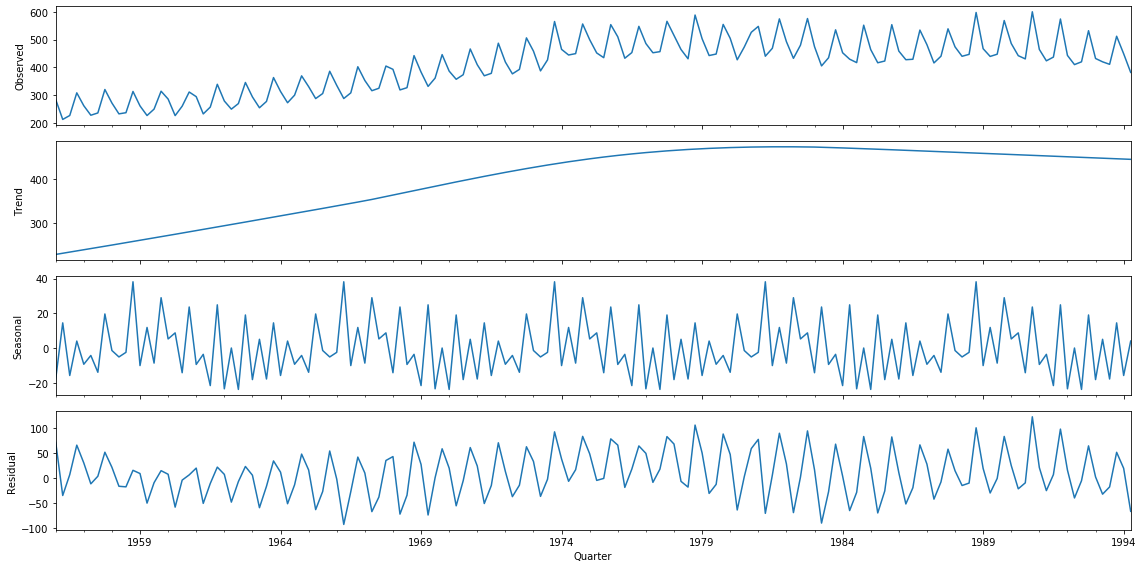

In [37]:
from stldecompose import decompose

beer_stl = decompose(beer['Megalitres'], period=30)
beer_stl.plot()
plt.show()

Die Kurve des saisonalen Effekts wird bei einer Periodendauer von 30 Tagen nicht mehr regelmässig.

# 11.3

## a)

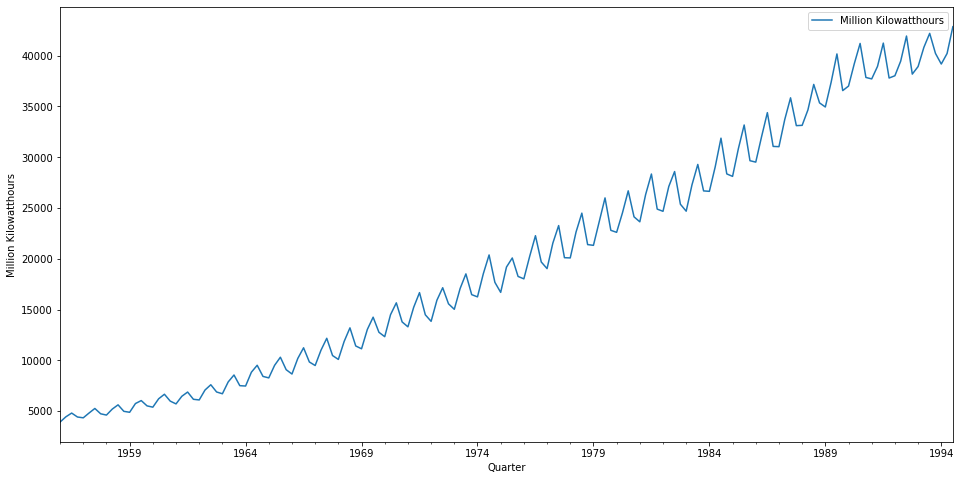

In [43]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

matplotlib.rcParams['figure.figsize'] = [16, 8]

electricity = pd.read_csv('electricity.csv', sep=';', header=0)
electricity['Quarter'] = pd.DatetimeIndex(electricity['Quarter'])
electricity.set_index('Quarter', inplace=True)
electricity.columns = ['Million Kilowatthours']
electricity.plot()
plt.ylabel('Million Kilowatthours')
plt.show()

## b)

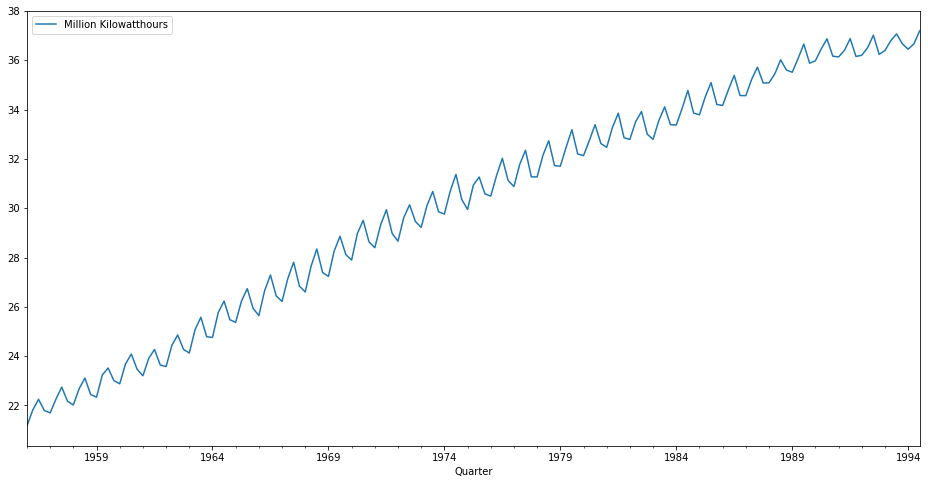

In [51]:
def boxcox(x, l):
    return np.log(x) if (l == 0) else (x**l-1)/l

electricity_tr = boxcox(electricity, 0.2)
electricity_tr.plot()
plt.show()

## c)

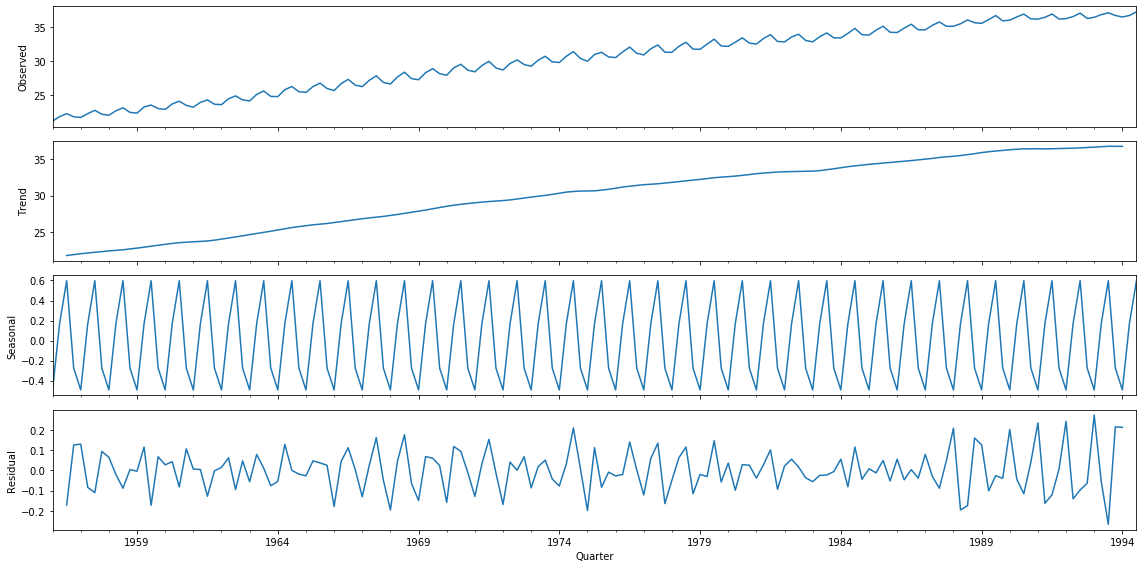

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(electricity_tr, model='additive', freq=4).plot()
plt.show()

- Saisonales Muster ersichtlich
- Residual wirkt völlig zufällig

## d)

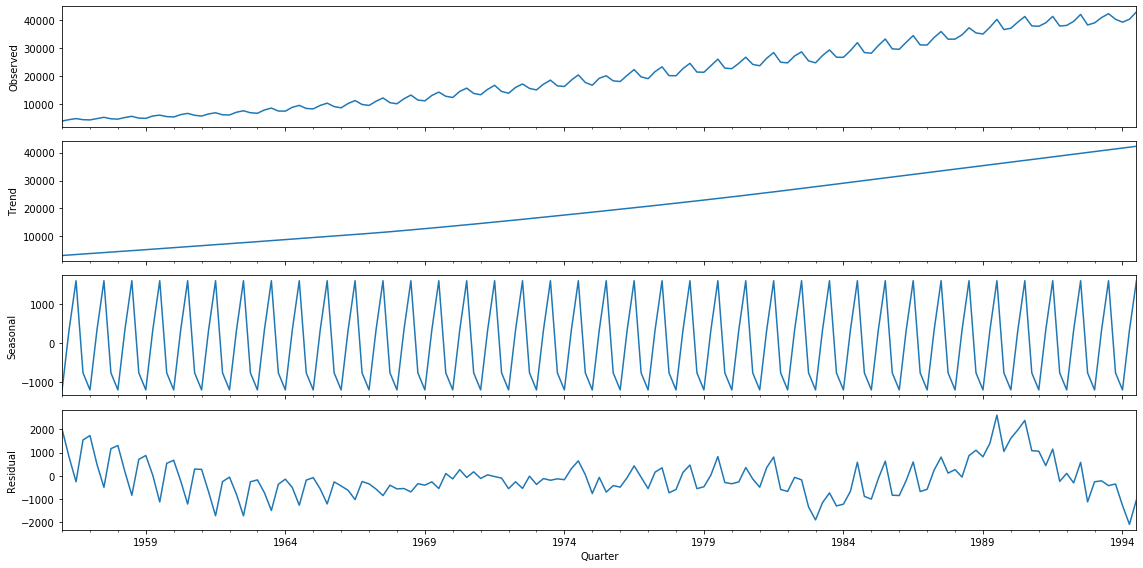

In [58]:
from stldecompose import decompose

electricity_stl = decompose(electricity['Million Kilowatthours'], period=4)
electricity_stl.plot()
plt.show()

- Saisonales Muster ersichtlich
- Residual wirkt wiederum völlig zufällig